# Medical Manuscript Helper

## 医学论文助手

### 1. 导入数据

In [1116]:
import pandas as pd
data = pd.read_csv('./data/duct/duct.csv')

### 2. 数据基本信息

* 数据前5项

In [1117]:
data.head(5).style

,group,age,menopause,gestation,pain,ectasia,multiple,distance,size
0,0,47,0,1,1,0,1,0,1
1,0,47,0,1,1,0,1,0,0
2,0,44,0,1,0,0,1,0,0
3,0,44,0,1,0,0,1,nan,1
4,0,44,0,1,0,0,1,0,1


* 行数，列数

In [1118]:
data.shape

(474, 9)

* 数据类型

In [1119]:
data.dtypes

group          int64
age            int64
menopause      int64
gestation      int64
pain           int64
ectasia        int64
multiple       int64
distance     float64
size         float64
dtype: object

* 数据基本特征

In [1120]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 474 entries, 0 to 473
Data columns (total 9 columns):
group        474 non-null int64
age          474 non-null int64
menopause    474 non-null int64
gestation    474 non-null int64
pain         474 non-null int64
ectasia      474 non-null int64
multiple     474 non-null int64
distance     393 non-null float64
size         468 non-null float64
dtypes: float64(2), int64(7)
memory usage: 33.4 KB


* 数据基本统计信息

In [1121]:
data.describe()

,group,age,menopause,gestation,pain,ectasia,multiple,distance,size
count,474.000,474.000,474.000,474.000,474.000,474.000,474.000,393.000,468.000
mean,0.462,41.222,0.129,0.861,0.179,0.080,0.601,0.448,0.502
std,0.499,10.785,0.335,0.347,0.384,0.272,0.490,0.498,0.501
min,0.000,12.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,0.000,35.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000
50%,0.000,42.000,0.000,1.000,0.000,0.000,1.000,0.000,1.000
75%,1.000,47.000,0.000,1.000,0.000,0.000,1.000,1.000,1.000
max,1.000,77.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000


* 分组情况（按第一列分组）

In [1122]:
data.groupby(data.columns[0]).size()

group
0    255
1    219
dtype: int64

* 小数位数设置

In [1123]:
pd.set_option('precision', 3) 

* 数据相关性

In [1125]:
data.corr()

,group,age,menopause,gestation,pain,ectasia,multiple,distance,size
group,1.000,0.307,0.061,0.202,0.162,0.209,0.037,-0.232,-0.188
age,0.307,1.000,0.489,0.576,0.092,0.110,-0.085,-0.077,-0.227
menopause,0.061,0.489,1.000,0.118,0.100,-0.021,-0.112,-0.021,-0.104
gestation,0.202,0.576,0.118,1.000,0.029,0.096,-0.029,-0.057,-0.170
pain,0.162,0.092,0.100,0.029,1.000,0.065,0.010,-0.013,-0.008
ectasia,0.209,0.110,-0.021,0.096,0.065,1.000,0.002,0.016,-0.033
multiple,0.037,-0.085,-0.112,-0.029,0.010,0.002,1.000,-0.011,0.030
distance,-0.232,-0.077,-0.021,-0.057,-0.013,0.016,-0.011,1.000,0.012
size,-0.188,-0.227,-0.104,-0.170,-0.008,-0.033,0.030,0.012,1.000


* 数据高斯分布偏离

In [1124]:
data.skew()

group        0.153
age          0.087
menopause    2.225
gestation   -2.091
pain         1.677
ectasia      3.102
multiple    -0.415
distance     0.211
size        -0.009
dtype: float64

### 3. 数据可视化

In [1127]:
from matplotlib import pyplot
%config InlineBackend.figure_format = 'svg'

* 单变量直方图

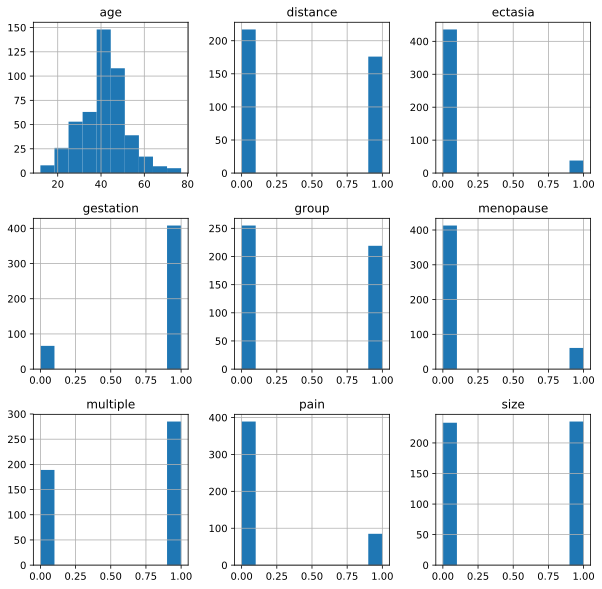

In [1126]:
data.hist(figsize=(10,10));

* 单变量密度图

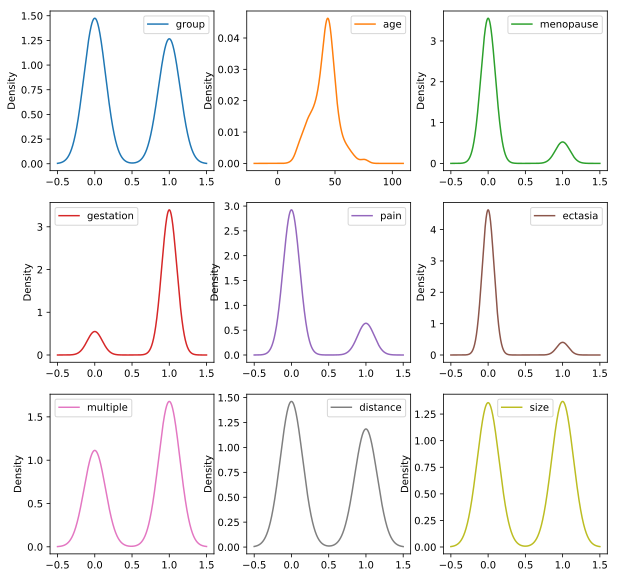

In [1128]:
data.plot(kind='density', subplots=True, figsize=(10,10), layout=(3,3), sharex=False);

* 单变量箱图

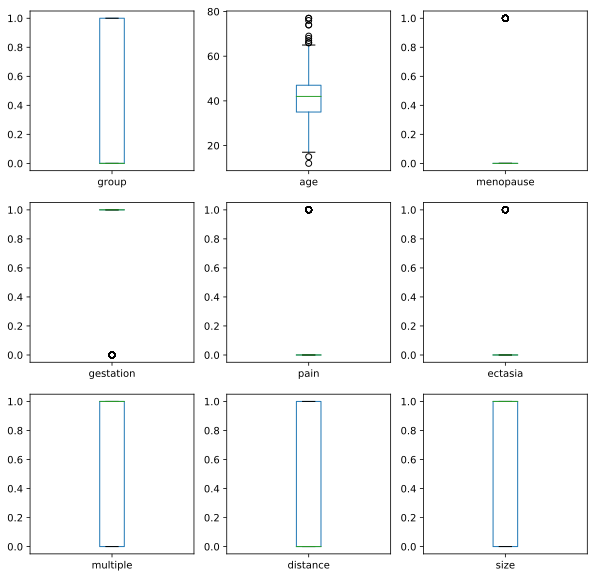

In [1129]:
data.plot(kind='box', subplots=True, figsize=(10,10), layout=(3,3), sharex=False);

* 多变量相关矩阵图

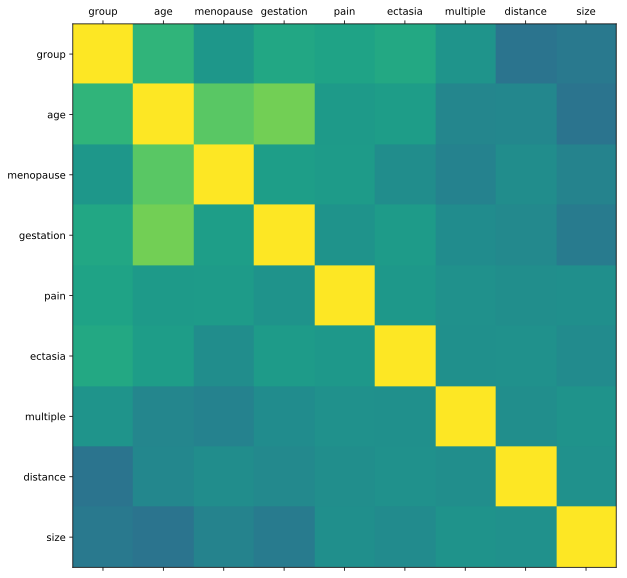

In [1130]:
import numpy as np
correlations = data.corr()
fig = pyplot.figure()
ax = fig.add_subplot('111')
ax.matshow(correlations, vmin=-1, vmax=1)
ticks = np.arange(0, 9, 1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(data.columns)
ax.set_yticklabels(data.columns)
fig.set_size_inches(10,10)

* 散点矩阵图

In [1132]:
# pd.plotting.scatter_matrix(data, figsize=(15,15));

### 4. 数据预处理

* 数据缺失值处理

In [1131]:
traindata = data.dropna()

* 分离数据

In [1133]:
from sklearn.model_selection import train_test_split
array = traindata.values
X = array[:,1:]
Y = array[:,0]

* 调整尺度

In [1134]:
from sklearn.preprocessing import MinMaxScaler
transformer = MinMaxScaler(feature_range=(0,1))
X = transformer.fit_transform(X)

### 5. 评估算法

* 数据分组

In [1135]:
testsize = 0.2
seed = 3
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=testsize, random_state=seed)

* 评估模型

In [1136]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

models = {}
models['LR'] = LogisticRegression(solver='liblinear')
models['LDA'] = LinearDiscriminantAnalysis()
models['KNN'] = KNeighborsClassifier()
models['CART'] = DecisionTreeClassifier()
models['NB'] = GaussianNB()
models['SVM'] = SVC(gamma='scale')

results = []
for key in models:
    kfold = KFold(n_splits=10, random_state=seed)
    cv_results = cross_val_score(models[key], X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)

* 箱图比较算法

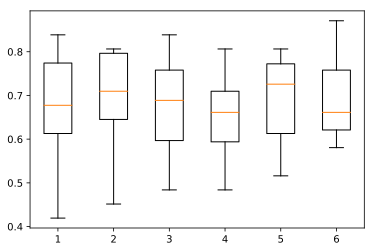

In [1137]:
pyplot.boxplot(results);

### 5. 预测

In [1138]:
svm = SVC(gamma='scale')
svm.fit(X=X_train, y=y_train)
predictions = svm.predict(X_test)

In [1141]:
accuracy_score(y_test, predictions)

0.6666666666666666

In [1140]:
confusion_matrix(y_test, predictions)

array([[35,  8],
       [18, 17]], dtype=int64)

In [1139]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

         0.0       0.66      0.81      0.73        43
         1.0       0.68      0.49      0.57        35

   micro avg       0.67      0.67      0.67        78
   macro avg       0.67      0.65      0.65        78
weighted avg       0.67      0.67      0.66        78

